In [26]:
import os
import pickle
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
from itertools import cycle
import torch 

import EWOthello.utils.plot_helpers as plt_utils
from EWOthello.mingpt.probe_model import BatteryProbeClassification
from EWOthello.data.othello import *
from EWOthello.mingpt.dataset import CharDataset 
from EWOthello.mingpt.model import GPT, GPTConfig, GPTforProbing, GPTforProbing_v2

In [27]:
datapath = "../EWOthello/ckpts/"
all_files = os.listdir(datapath)
GPT_Folders = [name for name in all_files if name.startswith("Dean_GPTv2_Synthetic")]
GPT_Folders.sort()
print(GPT_Folders)

['Dean_GPTv2_Synthetic_1L1H', 'Dean_GPTv2_Synthetic_1L8H', 'Dean_GPTv2_Synthetic_4L1H', 'Dean_GPTv2_Synthetic_4L8H', 'Dean_GPTv2_Synthetic_8L8H']


../EWOthello/ckpts/Dean_GPTv2_Synthetic_1L1H/
../EWOthello/ckpts/Dean_GPTv2_Synthetic_1L8H/
../EWOthello/ckpts/Dean_GPTv2_Synthetic_4L1H/
../EWOthello/ckpts/Dean_GPTv2_Synthetic_4L8H/
../EWOthello/ckpts/Dean_GPTv2_Synthetic_8L8H/


Text(0.5, 1.0, 'Legal Move Accuracy Testing Set')

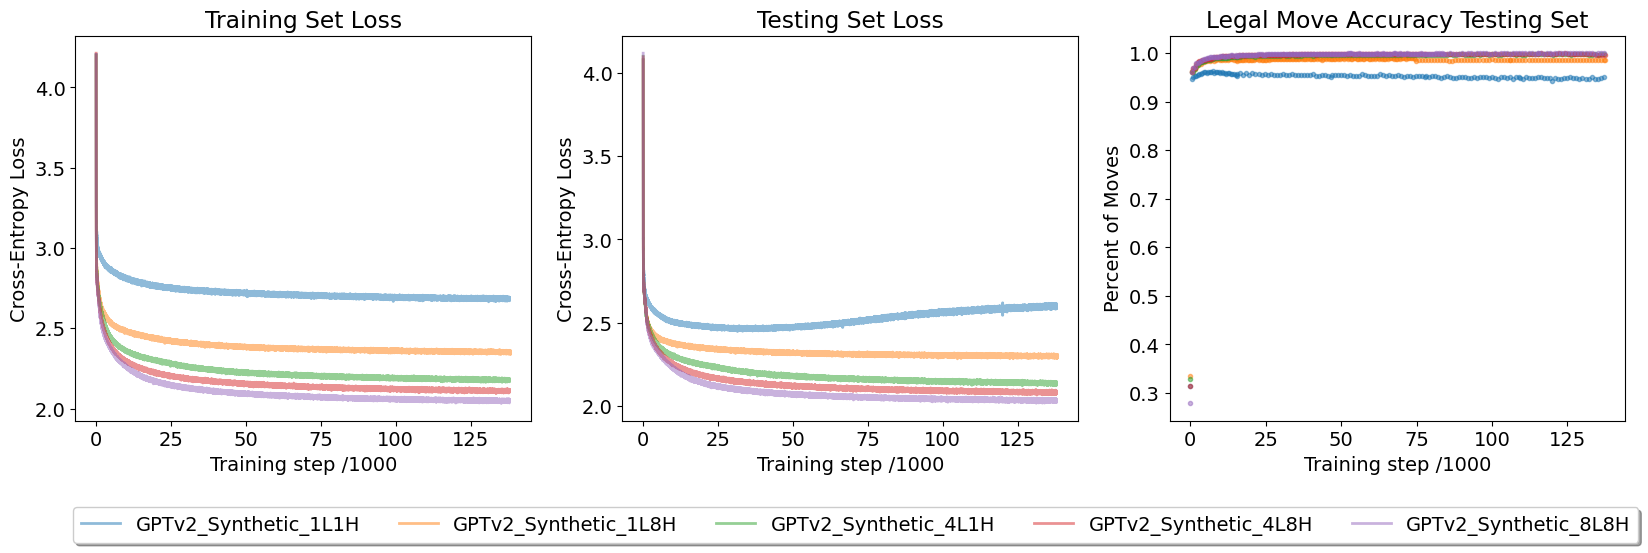

In [75]:
plt.rcParams.update({'font.size': 14})
fig = plt.figure(figsize=(20,5))
ax = plt_utils.addAxis(fig,1,3)
colors = cycle(['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:olive', 'tab:cyan'])

for fold in GPT_Folders:
    model_path = datapath + fold + "/"
    print(model_path)
    training_history_path = [name for name in os.listdir(model_path) if name.endswith("Heads.pickle")][0]
    use_color = next(colors)
    with open(model_path + training_history_path, 'rb') as fhandle:
        training_history = pickle.load(fhandle)
        training_loss = training_history["training_loss"]
        testing_loss = training_history["testing_loss"]
        val_legal_perc = training_history["val_legal_perc"]
        step = np.arange(0, len(training_loss), 1)/1000

        ax[0].plot(step, training_loss, '-', color=use_color, alpha=0.5, linewidth=2, label=fold[5:])
        ax[1].plot(step, testing_loss, '-', color=use_color, alpha=0.5, linewidth=2, label=fold[5:])
        ax[2].plot(step, val_legal_perc, '.', color=use_color, alpha=0.5, markersize=6)

#ax[0].legend()
ax[0].legend(ncol=5, fancybox=True, bbox_to_anchor=(3.45, -0.2), shadow=True)
ax[0].set_xlabel("Training step /1000")
ax[1].set_xlabel("Training step /1000")
ax[2].set_xlabel("Training step /1000")
ax[0].set_ylabel("Cross-Entropy Loss")
ax[1].set_ylabel("Cross-Entropy Loss")
ax[2].set_ylabel("Percent of Moves")
ax[0].set_title("Training Set Loss")
ax[1].set_title("Testing Set Loss")
ax[2].set_title("Legal Move Accuracy Testing Set")